Loaded 200 albums


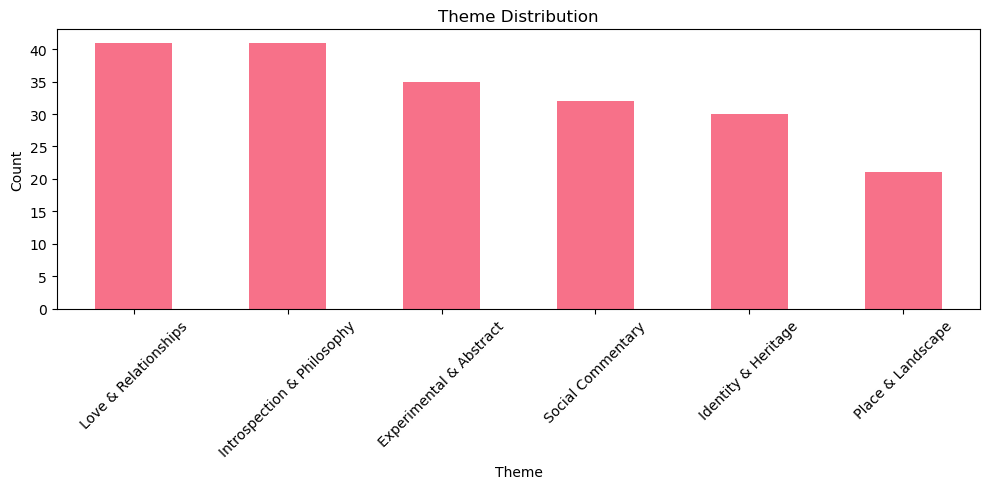

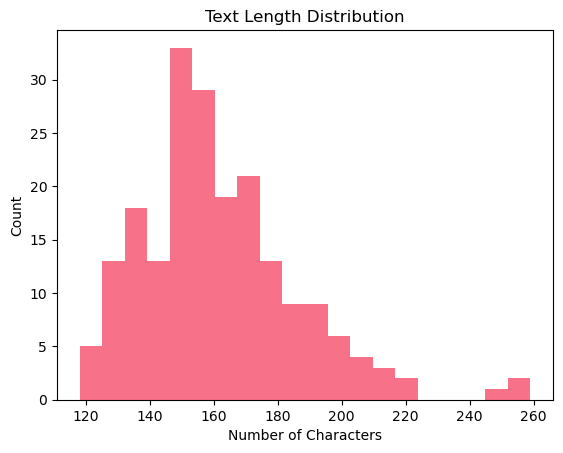

Average text length: 162
Median text length: 157
90th percentile: 193
Train size: 160
Validation size: 40
Saved train_val_split.npy


In [6]:
# Data Visualization and Train/Validation Split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load cleaned dataset
df = pd.read_csv('processed_data.csv')
print(f"Loaded {len(df)} albums")

# Plot theme distribution
df['theme_label'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Theme Distribution')
plt.xlabel('Theme')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check text lengths
df['text_length'] = df['text'].str.len()

plt.hist(df['text_length'], bins=20)
plt.title('Text Length Distribution')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.show()

print(f"Average text length: {df['text_length'].mean():.0f}")
print(f"Median text length: {df['text_length'].median():.0f}")
print(f"90th percentile: {np.percentile(df['text_length'], 90):.0f}")

# Train/validation split
X = df['text'].tolist()
y = df['label'].tolist()

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")

# Save for model training
split_data = {
    'X_train': X_train,
    'X_val': X_val,
    'y_train': y_train,
    'y_val': y_val
}

np.save('train_val_split.npy', split_data)
print("Saved train_val_split.npy")

Loaded 200 albums


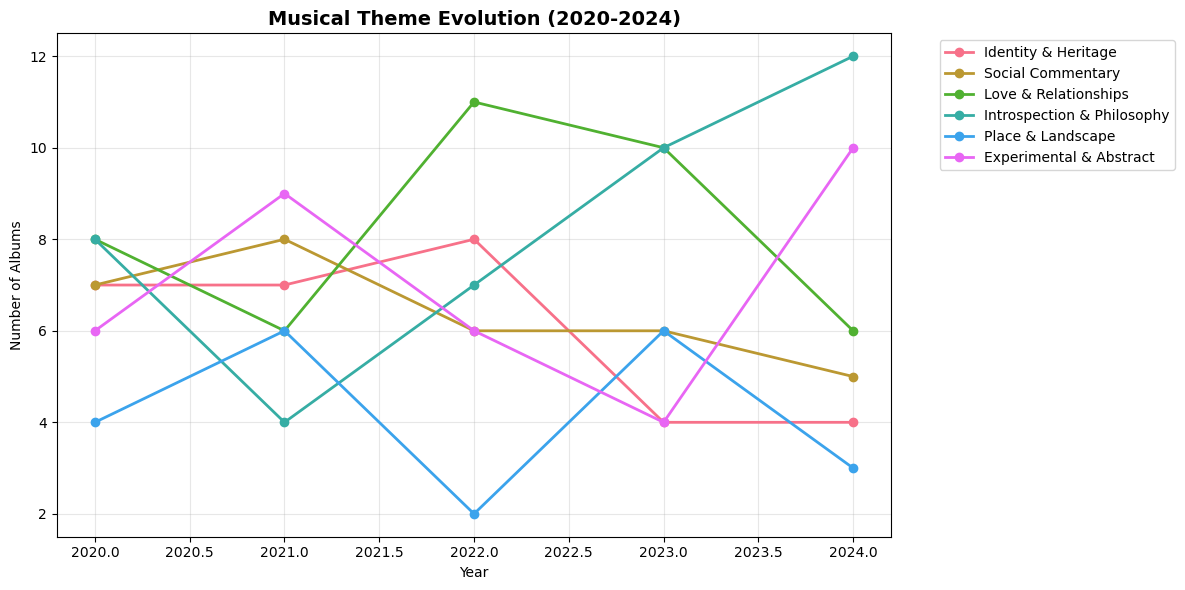

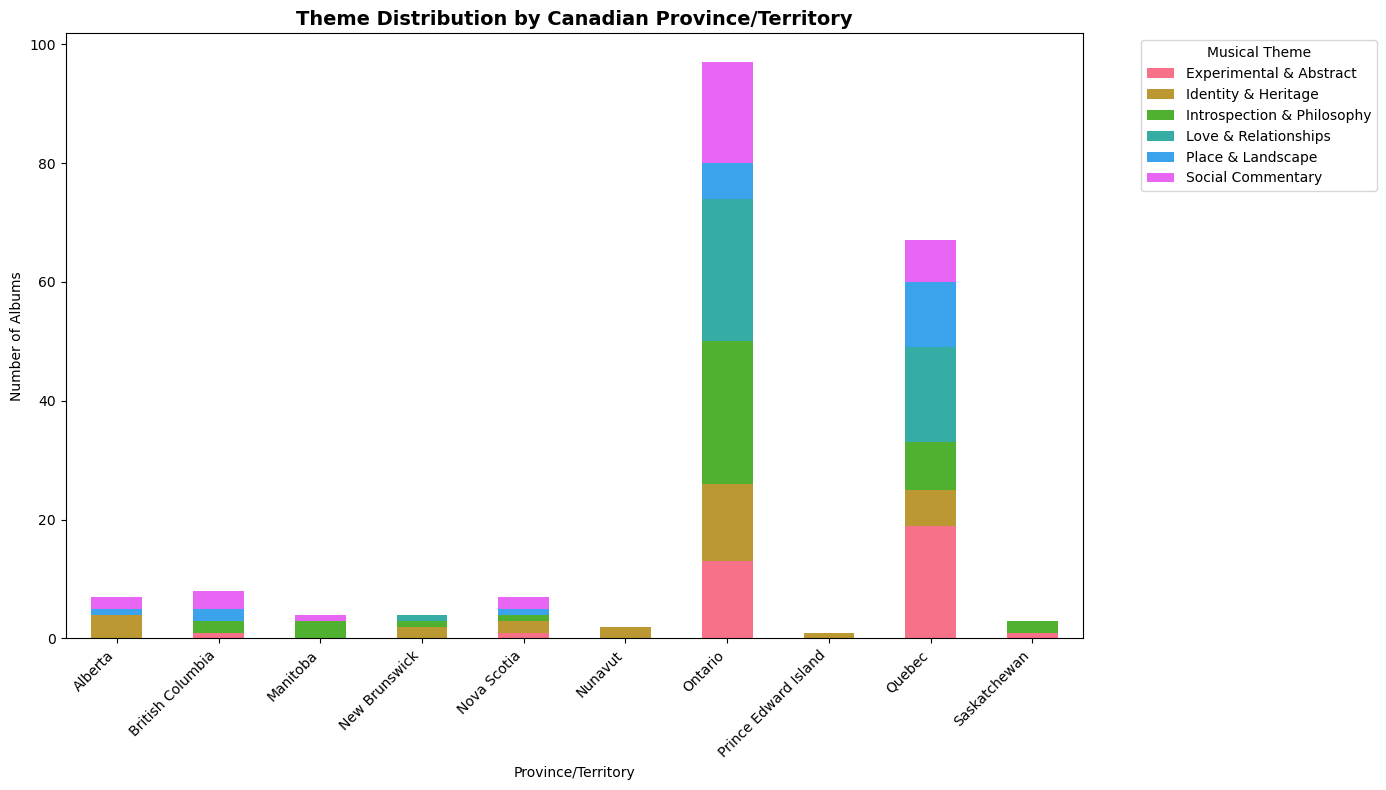

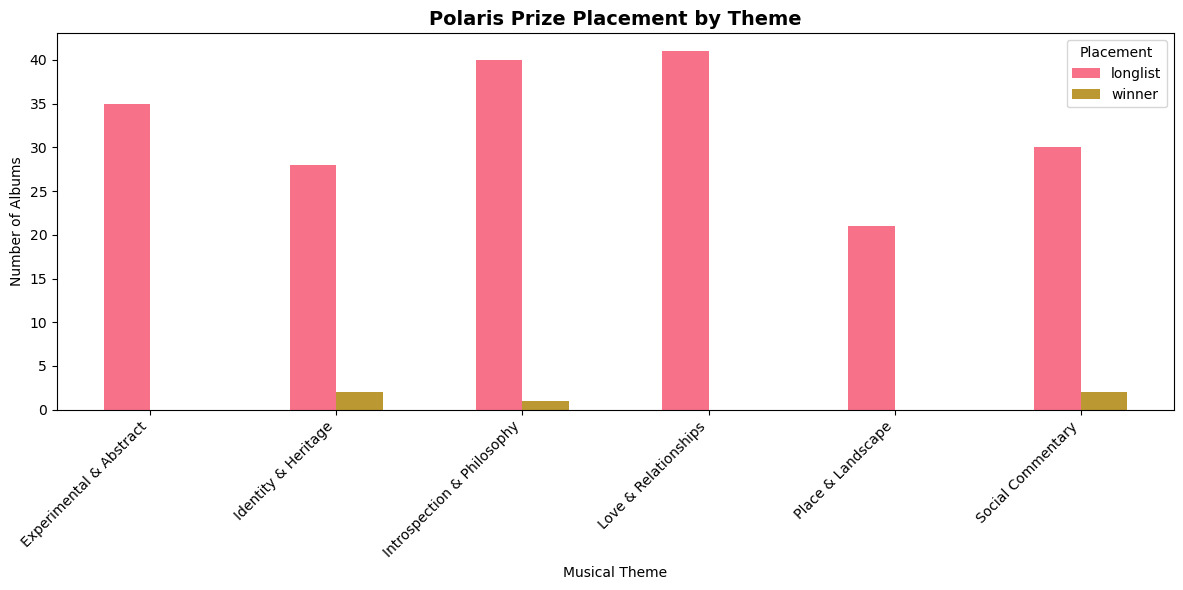


--- BASIC STATISTICS ---
Total albums: 200
Years covered: 2020 - 2024
Number of themes: 6
Number of regions: 10

Most common theme:
theme_label
Love & Relationships    41
Name: count, dtype: int64

Most represented region:
region
Ontario    97
Name: count, dtype: int64

Winners by theme:
theme_label
Identity & Heritage           2
Social Commentary             2
Introspection & Philosophy    1
Name: count, dtype: int64


In [7]:
# Load the dataset from parent folder
df = pd.read_csv('../polaris_training_dataset.csv')
print(f"Loaded {len(df)} albums")

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Group data by year and theme
theme_by_year = df.groupby(['year', 'theme_label']).size().reset_index(name='count')

# Create line plot
plt.figure(figsize=(12, 6))
for theme in df['theme_label'].unique():
    theme_data = theme_by_year[theme_by_year['theme_label'] == theme]
    plt.plot(theme_data['year'], theme_data['count'], marker='o', label=theme, linewidth=2)

plt.title('Musical Theme Evolution (2020-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Albums')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create pivot table for stacked bar chart
regional_themes = df.groupby(['region', 'theme_label']).size().unstack(fill_value=0)

# Create stacked bar chart
plt.figure(figsize=(14, 8))
regional_themes.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Theme Distribution by Canadian Province/Territory', fontsize=14, fontweight='bold')
plt.xlabel('Province/Territory')
plt.ylabel('Number of Albums')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Musical Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Count winners and longlist by theme
placement_theme = pd.crosstab(df['theme_label'], df['placement'])

# Create grouped bar chart
plt.figure(figsize=(12, 6))
placement_theme.plot(kind='bar', ax=plt.gca())
plt.title('Polaris Prize Placement by Theme', fontsize=14, fontweight='bold')
plt.xlabel('Musical Theme')
plt.ylabel('Number of Albums')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Placement')
plt.tight_layout()
plt.show()

# Statistics

print("\n--- BASIC STATISTICS ---")
print(f"Total albums: {len(df)}")
print(f"Years covered: {df['year'].min()} - {df['year'].max()}")
print(f"Number of themes: {df['theme_label'].nunique()}")
print(f"Number of regions: {df['region'].nunique()}")

print("\nMost common theme:")
print(df['theme_label'].value_counts().head(1))

print("\nMost represented region:")
print(df['region'].value_counts().head(1))

print("\nWinners by theme:")
winners = df[df['placement'] == 'winner']
print(winners['theme_label'].value_counts())